# Object Detection

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
yolo = cv2.dnn.readNet("./yolov3.cfg","./yolov3.weights")

In [ ]:
classes=[]
with open("./coco.names" ,"r")as f:
    classes=f.read().splitlines()

In [ ]:
len(classes)

In [ ]:
img = cv2.imread("d1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blob = cv2.dnn.blobFromImage(img,1/255.0,(416,416),(0,0,0),swapRB=True,crop=False)
plt.imshow(img)

In [ ]:
b_image=blob[0].reshape(416,416,3)
plt.imshow(b_image)
# r = blob[0, 0, :, :]
# plt.imshow(r)

In [ ]:
yolo.setInput(blob)

In [ ]:
output_layer_names=yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_names)

In [ ]:
boxes =[]
confidences=[]
class_ids=[]
h, w = img.shape[:2]
for output in layeroutput:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)  
        confidence = scores[classID]
        if confidence > 0.5:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            class_ids.append(classID)

In [ ]:
len(boxes)

In [ ]:
boxes

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [ ]:
indexes

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [ ]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    print(x,y,w,h)
    label =  str(classes[class_ids[i]])
    print(label)
    conf = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.putText(img,label+" "+conf,(x,y+20),font,0.5,(255,255,255),1)


In [ ]:
plt.imshow(img)

In [ ]:
cv2.imwrite("./output1.jpg",img)

# Using Tkinter

In [ ]:
import tkinter as tk
import PIL
from PIL import Image, ImageTk
import cv2
import numpy as np
import threading
import time
from threading import Thread
import cv2
import numpy as np
import matplotlib.pyplot as plt
class ObjectDetection(object):
    def __init__(self, num):
        self.capture = cv2.VideoCapture(0)
        
        self.yolo = cv2.dnn.readNet("./custom-yolov4-detector (2).cfg","./custom-yolov4-detector_best.weights")

        self.classes=[]
        with open("./train_data/classes.names" ,"r")as f:
            self.classes=f.read().splitlines()

        print(len(self.classes))

        
        self.thread = Thread(target=self.update, args=())
        self.thread.daemon = True
        self.thread.start()

    def update(self):
        while True:
            if self.capture.isOpened():
                (self.status, self.frame) = self.capture.read()
    def show_frame(self):
        if self.status:
            img = cv2.cvtColor(self.frame,cv2.COLOR_BGR2RGB)
            blob = cv2.dnn.blobFromImage(self.frame,1/255.0,(416,416),(0,0,0),swapRB=True,crop=False)
#             plt.imshow(img)

#             b_image=blob[0].reshape(320,320,3)
#             plt.imshow(b_image)
            self.yolo.setInput(blob)

            output_layer_names= self.yolo.getUnconnectedOutLayersNames()
            layeroutput = self.yolo.forward(output_layer_names)
       

            boxes =[]
            confidences=[]
            class_ids=[]
            h, w = img.shape[:2]
            print(len(layeroutput))
            for output in layeroutput:
                for detection in output:
                    scores = detection[5:]
                    classID = np.argmax(scores)

                    confidence = scores[classID]

                    if confidence > 0.4:
                        print(confidence)
                        box = detection[:4] * np.array([w, h, w, h])
                        (centerX, centerY, width, height) = box.astype("int")
                        x = int(centerX - (width / 2))
                        y = int(centerY - (height / 2))
                        box = [x, y, int(width), int(height)]
                        boxes.append(box)
                        confidences.append(float(confidence))
                        class_ids.append(classID)

            print(len(boxes))

            print(boxes)

            indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

            print(indexes)

            font = cv2.FONT_HERSHEY_PLAIN
            colors = np.random.uniform(0,255,size=(len(boxes),3))
            if(len(boxes)!=0):
                for i in indexes.flatten():
                    x,y,w,h = boxes[i]
                    print(x,y,w,h)
                    label = str(self.classes[class_ids[i]])
                    conf = str(round(confidences[i],2))
                    color = colors[i]
                    cv2.rectangle(img,(x,y),(x+w,y+h),color,10)
                    cv2.putText(img,label+" "+conf,(x,y+20),font,2,(255,255,255),2)

    #             plt.imshow(img)

                try:
                    scale_percent = 50
                    width = int(cv2image.shape[1] * scale_percent / 100)
                    height = int(cv2image.shape[0] * scale_percent / 100)
                    dim = (width, height)
                    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
                    img = Image.fromarray(resized)
                except:
                    img = Image.fromarray(img)
                imgtk = ImageTk.PhotoImage(image=img)
                lmain.imgtk = imgtk
                lmain.configure(image=imgtk)
                lmain.after(0, self.show_frame())
            else:
                img = Image.fromarray(img)
                imgtk = ImageTk.PhotoImage(image=img)
                lmain.imgtk = imgtk
                lmain.configure(image=imgtk)
                lmain.after(0, self.show_frame())

                
def cam(number):
    rtsp_stream_link = number
    video_stream_widget = ObjectDetection(number)
    while True:
        try:
            video_stream_widget.show_frame()
        except AttributeError:
            pass
        
if __name__ == '__main__':
    root = tk.Tk()
    root.geometry("655x655")
#     cam1Frame = tk.Frame(root, width=450, height=450,bg='black')
#     cam1Frame.grid(row=0, column=0, padx=3, pady=2)
    lmain = tk.Label(root)
    lmain.place(x=0, y=0)
    t1 = threading.Thread(target=cam, args=(0,))
    t1.start()
    root.mainloop()
    t1.join()
    

2
3
0
[]
()
3
0
[]
()
3
0.6248204
0.50313
0.57953775
0.50932044
0.45903268
0.44373715
6
[[42, 165, 185, 341], [46, 190, 174, 270], [34, 201, 204, 281], [52, 165, 166, 351], [44, 229, 229, 224], [51, 117, 210, 446]]
[0]
42 165 185 341
3
0.44790328
0.54303813
0.9051925
0.8774079
4
[[23, 198, 180, 246], [47, 181, 169, 280], [25, 163, 197, 312], [33, 157, 184, 323]]
[2]
25 163 197 312
3
0.72034174
0.94818115
0.93249935
0.5887591
4
[[25, 178, 170, 283], [10, 160, 218, 314], [17, 130, 204, 373], [0, 130, 244, 370]]
[1]
10 160 218 314
3
0.5510752
0.9303546
0.91122705
0.4209991
4
[[30, 183, 164, 275], [14, 159, 214, 318], [28, 125, 188, 386], [0, 115, 249, 399]]
[1]
14 159 214 318
3
0.5091152
0.8929273
0.8774874
0.558114
4
[[27, 155, 168, 328], [13, 158, 216, 316], [24, 126, 193, 378], [-4, 110, 257, 407]]
[1]
13 158 216 316
3
0
[]
()
3
0
[]
()
3
0
[]
()
3
0.69261533
0.4273621
0.5241158
3
[[244, 312, 226, 166], [207, 302, 300, 177], [211, 299, 289, 178]]
[0]
244 312 226 166
3
0
[]
()
3
0.72081

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\Nexgen\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\Nexgen\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-1-f947c42dca89>", line 118, in cam
  File "<ipython-input-1-f947c42dca89>", line 110, in show_frame
  File "<ipython-input-1-f947c42dca89>", line 110, in show_frame
  File "<ipython-input-1-f947c42dca89>", line 104, in show_frame
  File "<ipython-input-1-f947c42dca89>", line 104, in show_frame
  File "<ipython-input-1-f947c42dca89>", line 104, in show_frame
  [Previous line repeated 2 more times]
  File "<ipython-input-1-f947c42dca89>", line 110, in show_frame
  File "<ipython-input-1-f947c42dca89>", line 110, in show_frame
  File "<ipython-input-1-f947c42dca89>", line 110, in show_frame
  File "<ipython-input-1-f947c42dca89>", line 104, in show_frame
  File "<ipython-input-1-f947c42dca89>

3
0
[]
()


Exception ignored in: <function PhotoImage.__del__ at 0x000002372CB3C3A0>
Traceback (most recent call last):
  File "C:\Users\Nexgen\anaconda3\lib\site-packages\PIL\ImageTk.py", line 118, in __del__
    name = self.__photo.name
AttributeError: 'PhotoImage' object has no attribute '_PhotoImage__photo'


# Custom_Data

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
yolo = cv2.dnn.readNet("./custom-yolov4-detector.cfg","custom-yolov4-detector_best.weights")

In [14]:
classes=[]
with open("./train_data/classes.names" ,"r")as f:
    classes=f.read().splitlines()

len(classes)

5

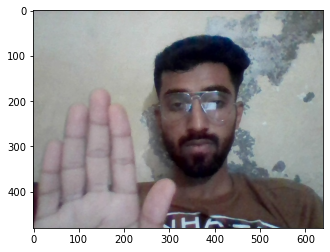

In [16]:
img = cv2.imread("train_data/img/hello.3b84bd1c-0445-11ed-83e8-f81654696a12.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blob = cv2.dnn.blobFromImage(img,1/255.0,(416,416),(0,0,0),swapRB=True,crop=False)
plt.imshow(img)

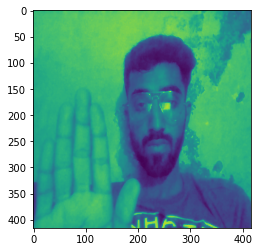

In [17]:
# b_image=blob[0].reshape(320,320,3)
# plt.imshow(b_image)
r = blob[0, 0, :, :]
plt.imshow(r)



In [18]:
yolo.setInput(blob)

output_layer_names=yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_names)

In [19]:
boxes =[]
confidences=[]
class_ids=[]
h, w = img.shape[:2]
for output in layeroutput:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)  
        confidence = scores[classID]
        if confidence >0.6:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            class_ids.append(classID)

len(boxes)

3

In [20]:
boxes

[[20, 170, 276, 289], [18, 148, 284, 334], [1, 174, 322, 284]]

In [21]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

indexes

array([1])

In [22]:

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

for i in indexes.flatten():
    x,y,w,h = boxes[i]
    print(x,y,w,h)
    label =  str(classes[class_ids[i]])
    print(label)
    conf = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,10)
    cv2.putText(img,label+" "+conf,(x,y+20),font,2,(255,255,255),2)


18 148 284 334
hello


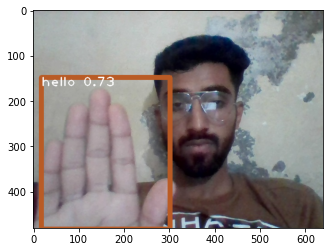

In [23]:
plt.imshow(img)

In [ ]:
cv2.imwrite("./output1.jpg",img)

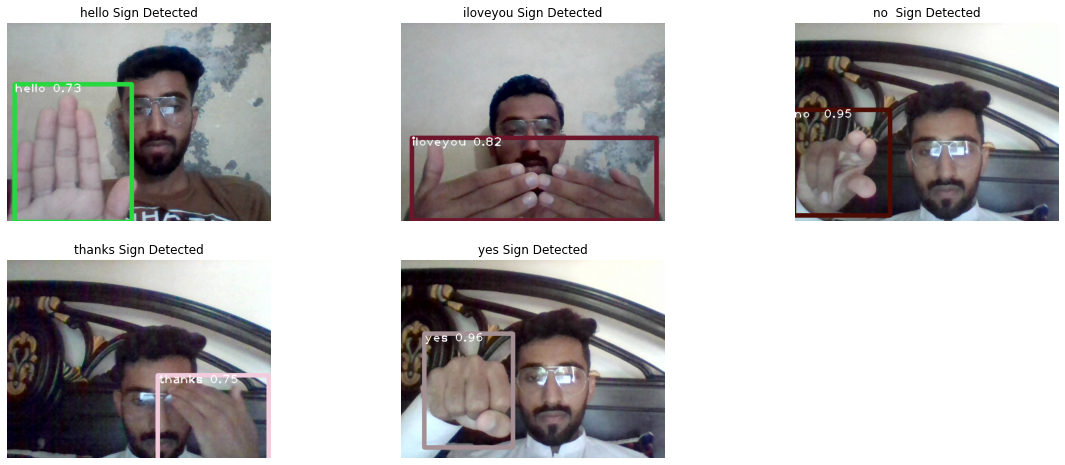

In [33]:
lstimg=[]
lstimg.append('hello.3b84bd1c-0445-11ed-83e8-f81654696a12.jpg')
lstimg.append('iloveyou.80a3c10d-1485-11ed-80f3-f81654696a12.jpg')
lstimg.append('no.90d26859-17a0-11ed-ae0a-f81654696a12.jpg')
lstimg.append('thanks.ba07d300-17a0-11ed-94ce-f81654696a12.jpg')
lstimg.append('yes.8a6074fa-17a0-11ed-98d2-f81654696a12.jpg')
plt.figure(figsize=(20,8))
count=1
for i in lstimg:
    plt.subplot(2,3,count)
    img = cv2.imread(f"train_data/img/{i}")
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    blob = cv2.dnn.blobFromImage(img,1/255.0,(416,416),(0,0,0),swapRB=True,crop=False)
    yolo.setInput(blob)

    output_layer_names=yolo.getUnconnectedOutLayersNames()
    layeroutput = yolo.forward(output_layer_names)

    boxes =[]
    confidences=[]
    class_ids=[]
    h, w = img.shape[:2]
    for output in layeroutput:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)  
            confidence = scores[classID]
            if confidence >0.6:
                box = detection[:4] * np.array([w, h, w, h])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                box = [x, y, int(width), int(height)]
                boxes.append(box)
                confidences.append(float(confidence))
                class_ids.append(classID)
    indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size=(len(boxes),3))
    label=''
    for i in indexes.flatten():
        x,y,w,h = boxes[i]
        label =  str(classes[class_ids[i]])
        conf = str(round(confidences[i],2))
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,10)
        cv2.putText(img,label+" "+conf,(x,y+20),font,2,(255,255,255),2)
        
    plt.axis('off')
    plt.title(f'{label} Sign Detected')
    plt.imshow(img)
    count+=1